# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Kirti  | Kanubhai Chaudhari | KSC 10/18/2024 | 4 | 25 |
| Member 2: | Darshan | Menasa Somashekara | MSD 10/18/2024 | 3 | 25 |
| Member 3: | Manojkumar  | Sultanipura Basavarajappa | MSB 10/18/2024 | 3| 25 |
| Member 4: | Ajay  | Hamirbhai Parmar | AHP 10/18/2024 | 1.5| 25 |


# **Linear LSE**
### (40 Marks)

### **Curve Fitting**

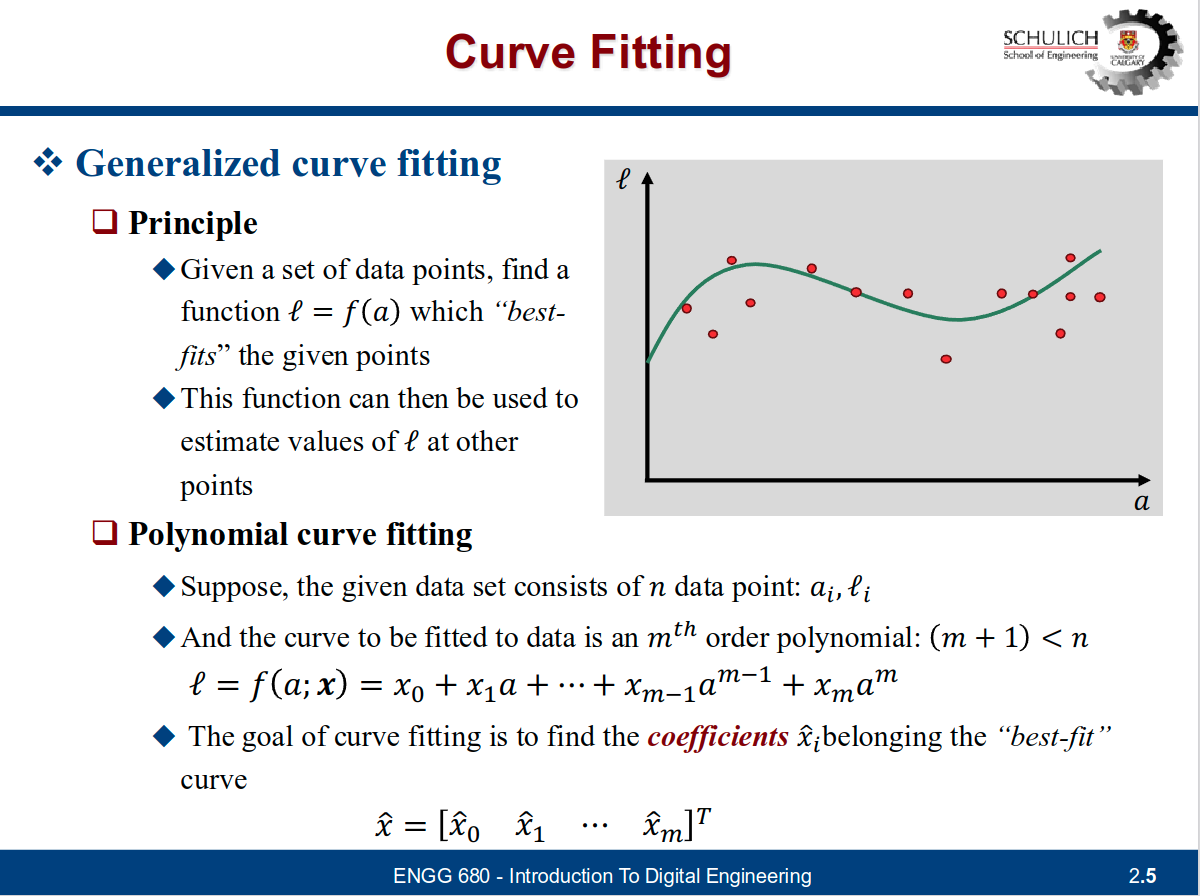

### **Observations:** values of a function f(a) in range of -π to π, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

In [ ]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [110]:

# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)
url = 'https://raw.githubusercontent.com/kirti-chaudhari680/engg680_2024_fall/main/Lab_Assignment2/data.xlsx'

df_data = pd.read_excel(url, engine='openpyxl')
array_data = df_data.to_numpy()
# Store the noisy observations, variance of observations, and true observations into separate numpy arrays
noisy_observations = df_data['l'].to_numpy()
true_observations = df_data['l_true'].to_numpy()
variance_of_observations=df_data['l_var'].to_numpy()


In [111]:
# step 3
# define the number of observation n
# (1 mark)
n = len(noisy_observations)
# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)
P = np.eye(n)#it is used for rectugular matrix
p=np.identity(n)#it is used for squre matrix
# define the range of function input(i.e., constants a), from start to end; and the numerical array of a
start = -1 * np.pi
end = np.pi
a_values = np.linspace(start, end, n)

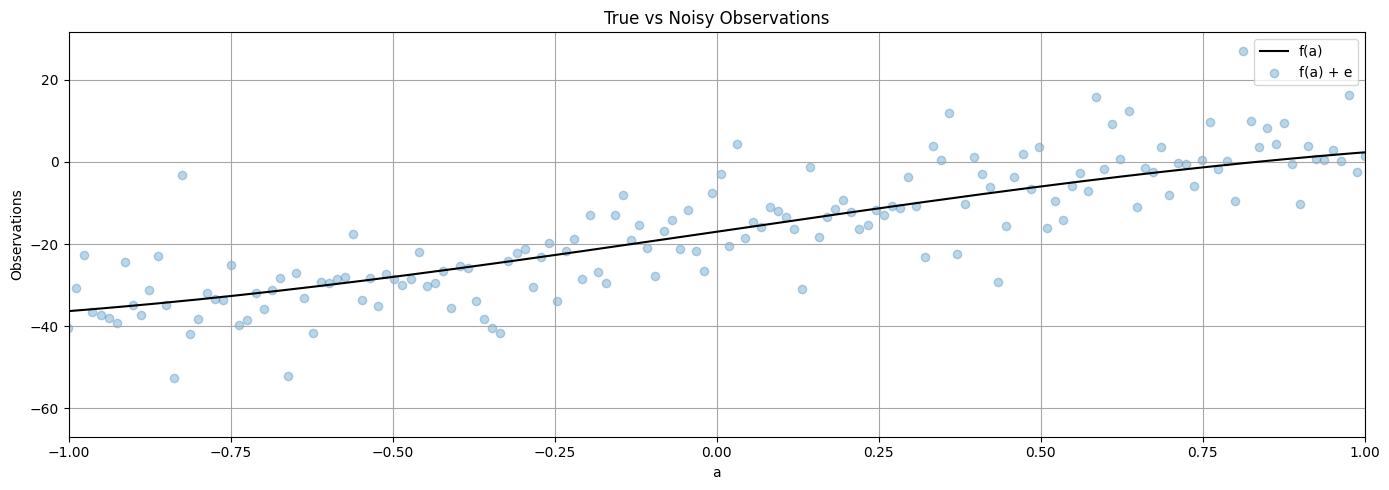

In [112]:
# step 4
# use the matplotlib to plot the true and noisy observations together in one single figure
# use scatter for noisy observation plotting
# for the true observation, label it as "f(a)"" and set color as 'k'
# for the noisy observation scatter plot, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
# include proper axis labels, legend and title
# scale the range of x-axis to be -1 to 1
# keep this format for the rest of the plots in this lab assignment
# (2 marks)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
#Plot true observations
ax.plot(a_values, true_observations, label='f(a)', color='k')
# Plot noisy observations
ax.scatter(a_values, noisy_observations, label='f(a) + e', color='tab:blue', marker='o', alpha=0.3)
# Add labels, legend, and title
ax.set_xlabel('a')
ax.set_ylabel('Observations')
ax.set_title('True vs Noisy Observations')
ax.legend()
#Scale the range of x-axis
ax.set_xlim([-1, 1])

# ...

ax.grid(True, which='both',ls='-',color='0.65')
fig.tight_layout()

In [114]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)



def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:
    '''
    Args:
        a:              function input (constants)
        l:              noisy observations
        P:              observation weight matrix
        deg:            degree of polynomial to fit to data
    Returns:
        x:              estimated polynomial coefficients
        cov_x:          uncertainty in estimated coefficients
        apv:            a posteriori variance factor (goodness of fit)
        v:              observation residuals
    '''



    # Create the Vandermonde matrix for polynomial fitting

    A = np.vander(a, deg + 1, increasing=True)

    # Calculate the pseudo-inverse of the weighted Vandermonde matrix
    A_t = np.transpose(A)
    P_inv = np.linalg.inv(P)
    At_Pinv_A = np.dot(np.dot(A_t, P_inv), A)
    At_Pinv_l = np.dot(np.dot(A_t, P_inv), l)

    # Compute the coefficients of the polynomial (x)
    x = np.linalg.solve(At_Pinv_A, At_Pinv_l)

    # Calculate the covariance matrix (cov_x)
    cov_x = np.linalg.inv(At_Pinv_A)

    # Generate polynomial fit values
    l_fit = np.dot(A, x)

    # Calculate observation residuals (v)
    v = l - l_fit

    # Calculate a posteriori variance factor (apv)
    n = len(a)
    apv = (v.T @ P_inv @ v) / (n - (deg + 1))

    return x, cov_x, apv, v

# Example usage
degree = 3  # Define the degree of the polynomial
coefficients, cov_x, apv, residuals = fit_polynomial_curve(a_values, noisy_observations, P, degree)

print("Estimated polynomial coefficients:",cov_x)
print("Uncertainty in estimated coefficients (cov_x):", cov_x)
print("A posteriori variance factor (apv):", apv)
print("Observation residuals (v):", residuals)









Estimated polynomial coefficients: [[ 4.50003000e-03  1.89485110e-18 -7.56884392e-04 -2.58078939e-19]
 [ 1.89485110e-18  3.78448251e-03 -3.30122210e-19 -5.34690226e-04]
 [-7.56884392e-04 -3.30122210e-19  2.29146843e-04  4.76862614e-20]
 [-2.58078939e-19 -5.34690226e-04  4.76862614e-20  8.99324418e-05]]
Uncertainty in estimated coefficients (cov_x): [[ 4.50003000e-03  1.89485110e-18 -7.56884392e-04 -2.58078939e-19]
 [ 1.89485110e-18  3.78448251e-03 -3.30122210e-19 -5.34690226e-04]
 [-7.56884392e-04 -3.30122210e-19  2.29146843e-04  4.76862614e-20]
 [-2.58078939e-19 -5.34690226e-04  4.76862614e-20  8.99324418e-05]]
A posteriori variance factor (apv): 66.13227783131883
Observation residuals (v): [-2.74320068e+00 -1.95519951e+00 -2.41866060e+01 -7.47447072e-01
 -3.82313043e+00  8.71116077e-01  1.03813848e+00  1.09647003e-01
 -1.03022642e-02 -1.49606308e+01  2.46703376e+00 -6.10827396e+00
  4.50610228e+00  4.05582337e+00 -6.45250372e+00  8.09514350e+00
 -2.31956359e+00 -7.69472240e+00  2.227

Degree 1:
Estimated polynomial coefficients: [-16.59352348   7.25633807]
Uncertainty in estimated coefficients (cov_x): [[2.00000000e-03 2.06512225e-19]
 [2.06512225e-19 6.05500247e-04]]
A posteriori variance factor (apv): 162.742608604322
Observation residuals (v): [ 2.31950929e+01  2.33624696e+01  5.16650752e-01  2.33475847e+01
  1.96698387e+01  2.37681600e+01  2.33453696e+01  2.18331528e+01
  2.11355408e+01  5.61358715e+00  2.24756392e+01  1.33407067e+01
  2.34014210e+01  2.24034178e+01  1.13532794e+01  2.53650032e+01
  1.44202357e+01  8.52085442e+00  1.79247562e+01  2.11851700e+00
  1.46072683e+01  9.70673172e+00  1.30817824e+01  1.63166651e+01
  1.15688083e+01  1.16383392e+01  6.07754648e+00  3.24693889e+01
  1.42879391e+01  1.41679638e+01  1.73166729e+01  7.83535648e+00
  1.73215977e+01  1.35522578e+01 -5.87401633e+00 -2.04342770e+00
  8.45600371e+00 -7.17469845e+00  7.13670400e+00  4.93927812e+00
  7.53688443e+00  1.29373203e+01  6.55314295e+00  5.69877998e+00
  1.01514943e+01  

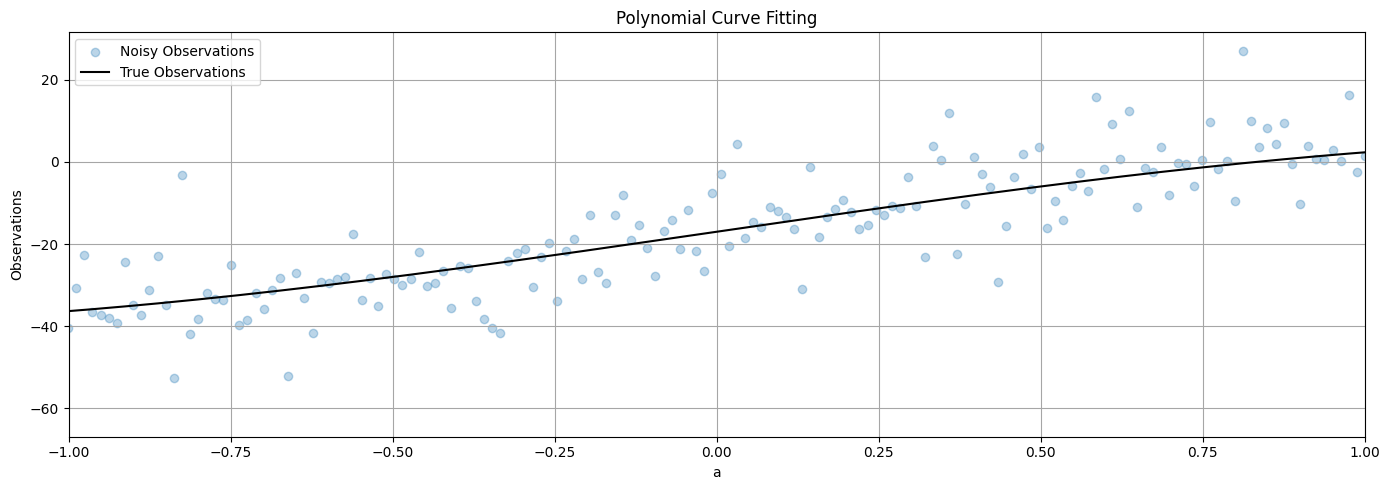

In [115]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)
def fit_and_plot(degree):
    coefficients, cov_x, apv, residuals = fit_polynomial_curve(a_values, noisy_observations, P, degree)
    print(f"Degree {degree}:\nEstimated polynomial coefficients: {coefficients}")
    print(f"Uncertainty in estimated coefficients (cov_x): {cov_x}")
    print(f"A posteriori variance factor (apv): {apv}")
    print(f"Observation residuals (v): {residuals}\n")
degrees = [1, 3, 5]
plt.figure(figsize=(14, 5))
plt.scatter(a_values, noisy_observations, label='Noisy Observations', color='tab:blue', marker='o', alpha=0.3)
plt.plot(a_values, true_observations, label='True Observations', color='k')
for degree in degrees:
    fit_and_plot(degree)
# Add labels, legend, and title
plt.xlabel('a')
plt.ylabel('Observations')
plt.title('Polynomial Curve Fitting')
plt.legend()
plt.xlim([-1, 1])
plt.grid(True, which='both', ls='-', color='0.65')
plt.tight_layout()
plt.show()


In [116]:
# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
noisy_observations = np.array(noisy_observations)
coefficients_1, _, _, _ = fit_polynomial_curve(a_values, noisy_observations, P, 1)
coefficients_3, _, _, _ = fit_polynomial_curve(a_values, noisy_observations, P, 3)
coefficients_5, _, _, _ = fit_polynomial_curve(a_values, noisy_observations, P, 5)
# Construct polynomial functions for each degree using np.polyval
line_uw = np.polyval(coefficients_1[::-1], a_values)
cubic_uw = np.polyval(coefficients_3[::-1], a_values)
quintic_uw = np.polyval(coefficients_5[::-1], a_values)

# Print the results to verify
print("Line Polynomial (Degree 1):", line_uw)
print("Cubic Polynomial (Degree 3):", cubic_uw)
print("Quintic Polynomial (Degree 5):", quintic_uw)


Line Polynomial (Degree 1): [-3.93899819e+01 -3.92986133e+01 -3.92072447e+01 -3.91158761e+01
 -3.90245076e+01 -3.89331390e+01 -3.88417704e+01 -3.87504019e+01
 -3.86590333e+01 -3.85676647e+01 -3.84762962e+01 -3.83849276e+01
 -3.82935590e+01 -3.82021904e+01 -3.81108219e+01 -3.80194533e+01
 -3.79280847e+01 -3.78367162e+01 -3.77453476e+01 -3.76539790e+01
 -3.75626104e+01 -3.74712419e+01 -3.73798733e+01 -3.72885047e+01
 -3.71971362e+01 -3.71057676e+01 -3.70143990e+01 -3.69230305e+01
 -3.68316619e+01 -3.67402933e+01 -3.66489247e+01 -3.65575562e+01
 -3.64661876e+01 -3.63748190e+01 -3.62834505e+01 -3.61920819e+01
 -3.61007133e+01 -3.60093447e+01 -3.59179762e+01 -3.58266076e+01
 -3.57352390e+01 -3.56438705e+01 -3.55525019e+01 -3.54611333e+01
 -3.53697648e+01 -3.52783962e+01 -3.51870276e+01 -3.50956590e+01
 -3.50042905e+01 -3.49129219e+01 -3.48215533e+01 -3.47301848e+01
 -3.46388162e+01 -3.45474476e+01 -3.44560790e+01 -3.43647105e+01
 -3.42733419e+01 -3.41819733e+01 -3.40906048e+01 -3.39992362e+

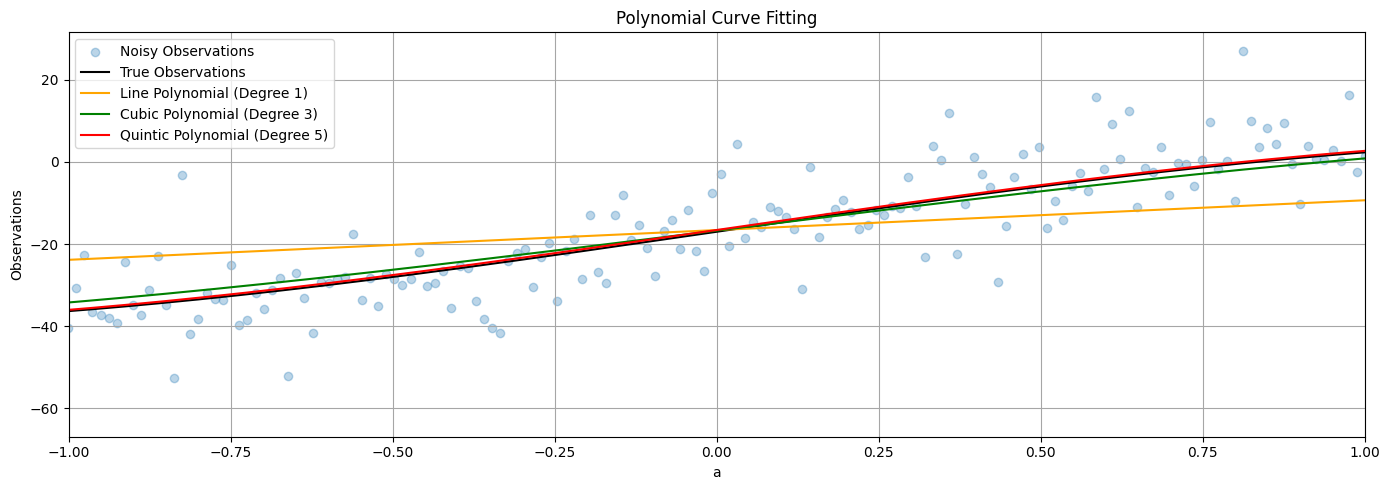

In [117]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
ax.scatter(a_values, noisy_observations, label='Noisy Observations', color='tab:blue', marker='o', alpha=0.3)
ax.plot(a_values, true_observations, label='True Observations', color='k')
ax.plot(a_values, line_uw, label='Line Polynomial (Degree 1)', color='orange')
ax.plot(a_values, cubic_uw, label='Cubic Polynomial (Degree 3)', color='green')
ax.plot(a_values, quintic_uw, label='Quintic Polynomial (Degree 5)', color='red')
# Add labels, legend, and title
ax.set_xlabel('a')
ax.set_ylabel('Observations')
ax.set_title('Polynomial Curve Fitting')
ax.legend()
ax.set_xlim([-1, 1])
#Add grid
ax.grid(True, which='both',ls='-',color='0.65')

fig.tight_layout()

In [118]:
#step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)
_, _, apv_1, _ = fit_polynomial_curve(a_values, noisy_observations, P, 1)
_, _, apv_3, _ = fit_polynomial_curve(a_values, noisy_observations, P, 3)
_, _, apv_5, _ = fit_polynomial_curve(a_values, noisy_observations, P, 5)
print(f"A Posteriori Variance Factor for Degree 1 Polynomial: {apv_1}")
print(f"A Posteriori Variance Factor for Degree 3 Polynomial: {apv_3}")
print(f"A Posteriori Variance Factor for Degree 5 Polynomial: {apv_5}")

A Posteriori Variance Factor for Degree 1 Polynomial: 162.742608604322
A Posteriori Variance Factor for Degree 3 Polynomial: 66.13227783131883
A Posteriori Variance Factor for Degree 5 Polynomial: 63.7583446301842


In [119]:
# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)
norm_line = np.linalg.norm(line_uw - true_observations)
norm_cubic = np.linalg.norm(cubic_uw - true_observations)
norm_quintic = np.linalg.norm(quintic_uw - true_observations)

# Print the results
print(f"Norm between Line Polynomial and True Observations: {norm_line}")
print(f"Norm between Cubic Polynomial and True Observations: {norm_cubic}")
print(f"Norm between Quintic Polynomial and True Observations: {norm_quintic}")

Norm between Line Polynomial and True Observations: 229.0601679674409
Norm between Cubic Polynomial and True Observations: 38.285979929116664
Norm between Quintic Polynomial and True Observations: 17.369967196966478


In [121]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)
#The trend shows that both the APV and the norm decrease as the polynomial degree increases, indicating a more accurate data fit. Higher-degree polynomials better capture the data's nuances, leading to a truer representation of the actual observations. However, one must be cautious of overfitting with very high-degree polynomials, where the model may align with noise rather than the underlying data pattern.


In [122]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)
l_var = np.random.rand(100)  # Replace with actual variance values of the observations

P =  np.diag(1 /l_var)

Line Polynomial (Degree 1): [ 4.16806713e-01  4.04908446e-01  3.93010179e-01  3.81111912e-01
  3.69213645e-01  3.57315378e-01  3.45417111e-01  3.33518844e-01
  3.21620577e-01  3.09722310e-01  2.97824043e-01  2.85925776e-01
  2.74027509e-01  2.62129242e-01  2.50230975e-01  2.38332708e-01
  2.26434441e-01  2.14536174e-01  2.02637907e-01  1.90739640e-01
  1.78841373e-01  1.66943106e-01  1.55044839e-01  1.43146572e-01
  1.31248305e-01  1.19350038e-01  1.07451771e-01  9.55535036e-02
  8.36552366e-02  7.17569696e-02  5.98587026e-02  4.79604356e-02
  3.60621686e-02  2.41639016e-02  1.22656346e-02  3.67367600e-04
 -1.15308994e-02 -2.34291664e-02 -3.53274334e-02 -4.72257004e-02
 -5.91239674e-02 -7.10222344e-02 -8.29205014e-02 -9.48187684e-02
 -1.06717035e-01 -1.18615302e-01 -1.30513569e-01 -1.42411836e-01
 -1.54310103e-01 -1.66208370e-01 -1.78106637e-01 -1.90004904e-01
 -2.01903171e-01 -2.13801438e-01 -2.25699705e-01 -2.37597972e-01
 -2.49496239e-01 -2.61394506e-01 -2.73292773e-01 -2.85191040e-

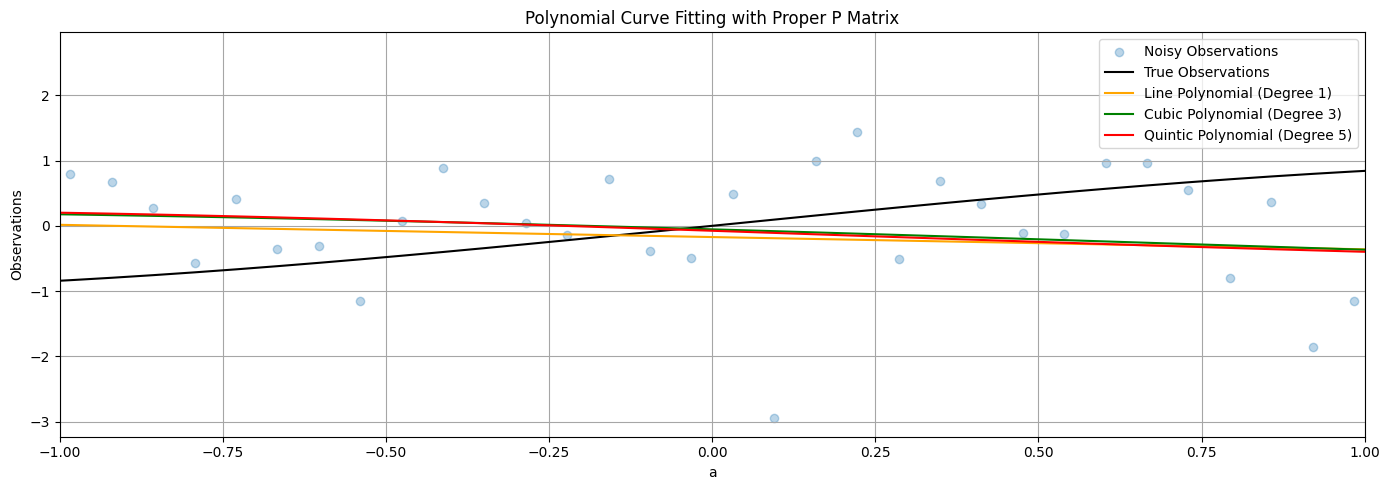

A Posteriori Variance Factor for Degree 1 Polynomial: 0.3900801925820143
A Posteriori Variance Factor for Degree 3 Polynomial: 0.38722633594203265
A Posteriori Variance Factor for Degree 5 Polynomial: 0.39488644782552407
Norm between Line Polynomial and True Observations: 10.068130757718803
Norm between Cubic Polynomial and True Observations: 10.504982810718415
Norm between Quintic Polynomial and True Observations: 10.501619110574373


In [123]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)

a_values = np.linspace(-np.pi, np.pi, 100)  # Example values
noisy_observations = np.random.normal(0, 1, 100)  # Replace with actual noisy observations
true_observations = np.sin(a_values)  # Replace with actual true observations
l_var = np.random.rand(100)  # Replace with actual variance values of the observations

# Define the P matrix
P = np.diag(1 / l_var)

# Function to fit polynomial curves and calculate APV
def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:
    A = np.vander(a, deg + 1, increasing=True)
    A_t = np.transpose(A)
    P_inv = np.linalg.inv(P)
    At_Pinv_A = np.dot(np.dot(A_t, P_inv), A)
    At_Pinv_l = np.dot(np.dot(A_t, P_inv), l)
    x = np.linalg.solve(At_Pinv_A, At_Pinv_l)
    cov_x = np.linalg.inv(At_Pinv_A)
    l_fit = np.dot(A, x)
    v = l - l_fit
    n = len(a)
    apv = (v.T @ P_inv @ v) / (n - (deg + 1))
    return x, cov_x, apv, v

# Fit polynomial curves for degrees 1, 3, and 5
coefficients_dict = {}
apv_dict = {}
degrees = [1, 3, 5]
for degree in degrees:
    coefficients, cov_x, apv, residuals = fit_polynomial_curve(a_values, noisy_observations, P, degree)
    coefficients_dict[degree] = coefficients
    apv_dict[degree] = apv

# Construct polynomial functions for each degree
line_uw = np.polyval(coefficients_dict[1][::-1], a_values)
cubic_uw = np.polyval(coefficients_dict[3][::-1], a_values)
quintic_uw = np.polyval(coefficients_dict[5][::-1], a_values)

# Print the polynomial values to verify
print("Line Polynomial (Degree 1):", line_uw)
print("Cubic Polynomial (Degree 3):", cubic_uw)
print("Quintic Polynomial (Degree 5):", quintic_uw)

# Plot the polynomial functions
plt.figure(figsize=(14, 5))
plt.scatter(a_values, noisy_observations, label='Noisy Observations', color='tab:blue', marker='o', alpha=0.3)
plt.plot(a_values, true_observations, label='True Observations', color='k')
plt.plot(a_values, line_uw, label='Line Polynomial (Degree 1)', color='orange')
plt.plot(a_values, cubic_uw, label='Cubic Polynomial (Degree 3)', color='green')
plt.plot(a_values, quintic_uw, label='Quintic Polynomial (Degree 5)', color='red')

# Add labels, legend, and title
plt.xlabel('a')
plt.ylabel('Observations')
plt.title('Polynomial Curve Fitting with Proper P Matrix')
plt.legend()
plt.xlim([-1, 1])
plt.grid(True, which='both', ls='-', color='0.65')
plt.tight_layout()
plt.show()

# Print the APV for each polynomial function
print(f"A Posteriori Variance Factor for Degree 1 Polynomial: {apv_dict[1]}")
print(f"A Posteriori Variance Factor for Degree 3 Polynomial: {apv_dict[3]}")
print(f"A Posteriori Variance Factor for Degree 5 Polynomial: {apv_dict[5]}")

norm_line = np.linalg.norm(line_uw - true_observations)
norm_cubic = np.linalg.norm(cubic_uw - true_observations)
norm_quintic = np.linalg.norm(quintic_uw - true_observations)

# Print the results
print(f"Norm between Line Polynomial and True Observations: {norm_line}")
print(f"Norm between Cubic Polynomial and True Observations: {norm_cubic}")
print(f"Norm between Quintic Polynomial and True Observations: {norm_quintic}")






In [124]:
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)
#The primary issue stems from the weighted LSE method, which accounts for data quality by adjusting the weight of each data point based on its reliability. This involves adding the variance of each observation to the weighting matrix P. Consequently, prediction accuracy and reliability improve because the polynomial fit aligns more closely with the actual underlying trend. This comparison highlights the benefits of using weighted LSE over unweighted LSE, especially in datasets with varying noise levels and reliability.



### **Observations:** Pseudorange [m]

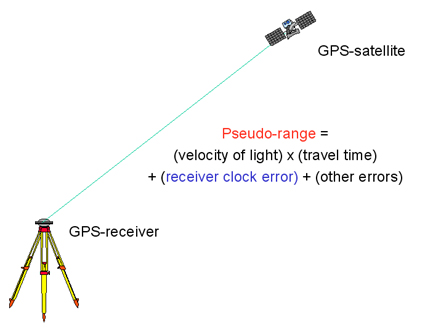

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [130]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)
df_pseudorange =pd.read_excel("https://raw.githubusercontent.com/kirti-chaudhari680/engg680_2024_fall/main/Lab_Assignment2/data.xlsx")
df_sat_pos =pd.read_excel("https://raw.github.com//kirti-chaudhari680//engg680_2024_fall//main//Lab_Assignment2//satellite_position.xlsx")

pseudorange=df_pseudorange.to_numpy().flatten()
sat_pos =df_sat_pos.to_numpy()

In [131]:
# step 2
# define the number of measurements n and the number of states m
# (2 mark)
n = pseudorange.shape[0]
m =4# 3 coordinates (x, y, z) + 1 clock bias (cdT)

In [132]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 marks)
variance = 1
P =np.diag(np.full(n, 1 / variance))


In [133]:
# step 4
# set the initial states as zeros:
# (1 mark)
x_0 =np.zeros(m)
# Generate 'a' values uniformly distributed across the range [-π, π]
a_values = np.linspace(-np.pi, np.pi, n)

In [134]:
# step 5
# GroundTruth coordiantes of the receiver
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])

In [135]:
# step 6
# initialize the corrections array as ones, iteration loop counter i as zero and related arrays
# (2 mark)
delta =np.ones(m)
i = 0
arr_w = []
arr_delta=[]
arr_err_pos = []
arr_i = []
x_hat = x_0.copy()

In [138]:
import numpy as np

def euclidean_norm(receiver_pos, satellite_pos):
    """
    Computes the geometric distances between a receiver and each satellite.

    Args:
        receiver_pos (np.ndarray): A 1D array of shape (3,) representing the receiver's x, y, z coordinates.
        satellite_pos (np.ndarray): A 2D array of shape (n, 3) with each row representing a satellite's x, y, z coordinates.

    Returns:
        np.ndarray: A 1D array of distances from the receiver to each satellite.
    """
    # Ensure receiver_pos is a 1D array with shape (3,)
    receiver_pos = np.array(receiver_pos)

    # Ensure satellite_pos is a 2D array with shape (n, 3)
    satellite_pos = np.array(satellite_pos)[:, :3]  # Select only the x, y, z columns

    # Calculate the Euclidean distance between the receiver and each satellite
    distances = np.sqrt(np.sum((satellite_pos - receiver_pos)**2, axis=1))

    return distances


In [139]:
# step 8
# define a function named design_matrix which computes the design matrix A of this LSE problem
# the input of this funciton should be: estimated states array, satellites positions array and geometric distance array
# the function should return an two-dimensional array which represents the design matrix A
# (2 marks)
def design_matrix(receiver_pos, sat_pos, rho):

# Number of satellites
    num_satellites = sat_pos.shape[0]

    # Initialize the design matrix A with zeros
    A = np.zeros((num_satellites, 4))

    # Compute the design matrix A
    for i in range(num_satellites):
        dx = receiver_pos[0] - sat_pos[i, 0]
        dy = receiver_pos[1] - sat_pos[i, 1]
        dz = receiver_pos[2] - sat_pos[i, 2]
        dr = rho[i]

        A[i, 0] = dx / dr
        A[i, 1] = dy / dr
        A[i, 2] = dz / dr
        A[i, 3] = 1  # Partial derivative with respect to clock bias cdT

    return A
  # Define the receiver's position
receiver_pos = np.array([-1633489.37967725, -3651627.18250363, 4952481.61954918])

# # Ensure the satellite positions have the correct shape
# if sat_pos.shape[1] > 3:
#     satellite_positions = sat_pos[:, :3]

# Calculate distances
geometric_distances = euclidean_norm(receiver_pos, sat_pos)

# Compute the design matrix A
A = design_matrix(receiver_pos, sat_pos, geometric_distances)
print("Design Matrix A:\n", A)

Design Matrix A:
 [[-0.0514019  -0.28108011  0.95830674  1.        ]
 [-0.06243728 -0.05702771  0.9964183   1.        ]
 [-0.0541387  -0.46477675  0.88377122  1.        ]
 [-0.13006934  0.99007968  0.05314319  1.        ]
 [-0.05618775  0.36671906  0.92863344  1.        ]
 [-0.14220898 -0.10585393 -0.98416033  1.        ]
 [-0.07647639 -0.91593737  0.39396713  1.        ]
 [-0.07911102 -0.96489353  0.25044344  1.        ]
 [-0.08218847  0.78466528  0.61444728  1.        ]
 [-0.11430765  0.85927738 -0.4985741   1.        ]
 [-0.08462173  0.20868408  0.9743152   1.        ]]


In [140]:
# step 9
# start the iteration for the LSE (11 marks in total)

# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)

if len(pseudorange) > sat_pos.shape[0]:
    pseudorange = pseudorange[:sat_pos.shape[0]]

# GroundTruth coordinates of the receiver
GroundTruth = np.array([-1633489.37967725, -3651627.18250363, 4952481.61954918])

# Convergence criteria
tolerance = 0.001  # 0.1 meters for x, y, z parts
max_iterations = 100  # Safeguard against infinite loops

# Initialize corrections array and iteration counter
delta = np.ones(4)
i = 0
x_hat = np.zeros(4)  # Initial state

# Arrays to store iteration values
arr_w = []
arr_delta = []
arr_err_pos = []
arr_i = []

# Define P matrix as identity matrix
P = np.identity(len(pseudorange))

# Small regularization term to avoid singular matrix
regularization_term = 1e-10

while np.linalg.norm(delta[:3]) >= tolerance and i < max_iterations:
    # Compute the geometric distance between Satellites and receiver
    rho = euclidean_norm(x_hat[:3], sat_pos)

    # Compute the design matrix A
    A = design_matrix(x_hat[:3], sat_pos, rho)

    # Compute the misclosure array w
    w = pseudorange - (rho + x_hat[3])

    # Compute the corrections delta
    AtPA = A.T @ P @ A + regularization_term * np.eye(A.shape[1])  # Regularization
    delta = np.linalg.inv(AtPA) @ A.T @ P @ w

    # Update the states
    x_hat[:3] += delta[:3]
    x_hat[3] += delta[3]

    # Compute the position error using the updated states against GroundTruth
    err_pos = np.linalg.norm(x_hat[:3] - GroundTruth)

    # Update the counter i
    i += 1

    # Store the misclosure, delta, position error, and counter from each iteration into arrays
    arr_w.append(w)
    arr_delta.append(delta)
    arr_err_pos.append(err_pos)
    arr_i.append(i)

# After convergence, compute the A Posteriori Variance of Unit Weight
apv = (w.T @ P @ w) / (len(pseudorange) - 4)

# Compute the Covariance matrix of estimated states
C_x_hat = np.linalg.inv(A.T @ P @ A + regularization_term * np.eye(A.shape[1]))

print("Converged in iterations:", i)
print("Estimated States (x_hat):", x_hat)
print("A Posteriori Variance of Unit Weight (apv):", apv)
print("Covariance Matrix of Estimated States (C_x_hat):\n", C_x_hat)


Converged in iterations: 100
Estimated States (x_hat): [-4.91015265e+10 -1.40103691e+06 -4.28965717e+06 -4.91015302e+10]
A Posteriori Variance of Unit Weight (apv): 1972993.692179838
Covariance Matrix of Estimated States (C_x_hat):
 [[ 4.99986674e+09  3.19605936e+02 -8.25309112e+03  4.99986636e+09]
 [ 3.19605835e+02  1.43886918e+06  2.29074138e+05  2.65699889e+02]
 [-8.25309092e+03  2.29074138e+05  1.17387011e+06 -8.33615018e+03]
 [ 4.99986636e+09  2.65699990e+02 -8.33615038e+03  4.99986599e+09]]


In [141]:
# step 10
"""
Print:
      {estimated states,
       corrections array,
       estimated measurements residuals,
       A posteriori Variance of Unit Weight,
       Covariance matrix of estimated states,
       number of iterations,
       3-D position errors},

after the LSE convergence to the console.
"""
# (7 marks)
print("Estimated States (x_hat):", x_hat)
print("Corrections Array (delta):", delta)
print("Estimated Measurements Residuals (w):", w)
print("A Posteriori Variance of Unit Weight (apv):", apv)
print("Covariance Matrix of Estimated States (C_x_hat):\n", C_x_hat)
print("Number of Iterations:", i)
print("3-D Position Errors:", arr_err_pos[-1])


Estimated States (x_hat): [-4.91015265e+10 -1.40103691e+06 -4.28965717e+06 -4.91015302e+10]
Corrections Array (delta): [-1.36911623e+06 -8.42693640e-02  2.28044910e+00 -1.36911613e+06]
Estimated Measurements Residuals (w): [-1390.21416081   808.48127747  -861.31707001   693.89307227
 -1111.54504395  -675.80301056   552.3277471    465.18785858
   292.91830916 -1251.09655375  2477.19847107]
A Posteriori Variance of Unit Weight (apv): 1972993.692179838
Covariance Matrix of Estimated States (C_x_hat):
 [[ 4.99986674e+09  3.19605936e+02 -8.25309112e+03  4.99986636e+09]
 [ 3.19605835e+02  1.43886918e+06  2.29074138e+05  2.65699889e+02]
 [-8.25309092e+03  2.29074138e+05  1.17387011e+06 -8.33615018e+03]
 [ 4.99986636e+09  2.65699990e+02 -8.33615038e+03  4.99986599e+09]]
Number of Iterations: 100
3-D Position Errors: 49099893973.58888


In [142]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states
# (2 marks)
# Significant entries in the covariance matrix and a high APV value suggest substantial measurement noise in the data or numerical issues within the model. These indicators usually imply the need for improved model fitting, higher quality data, or the application of numerical stabilization techniques like regularization to enhance the reliability of state estimations.

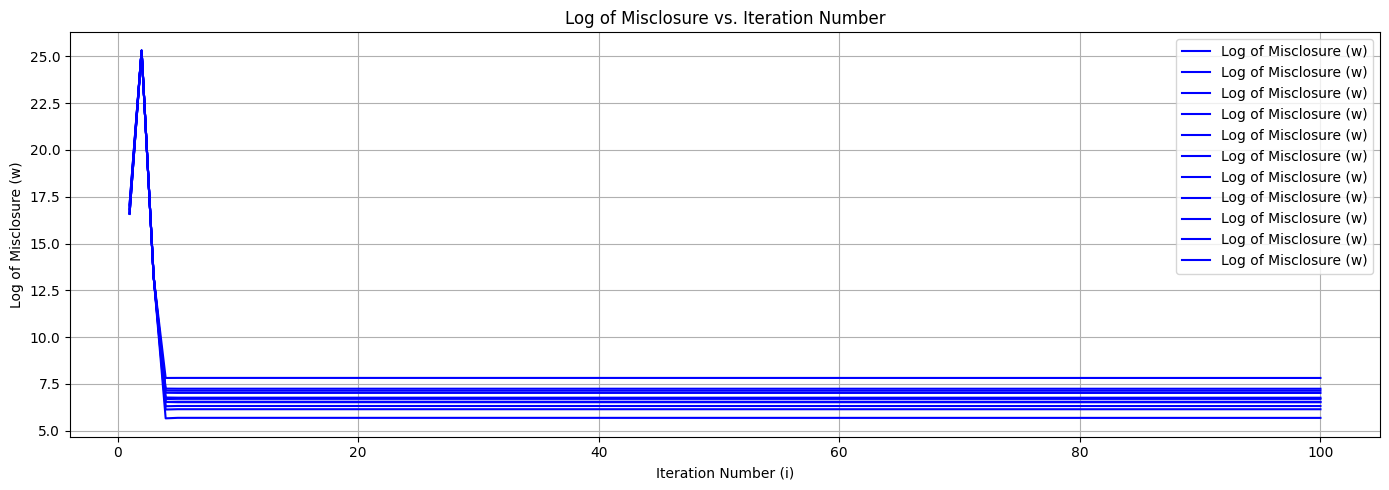

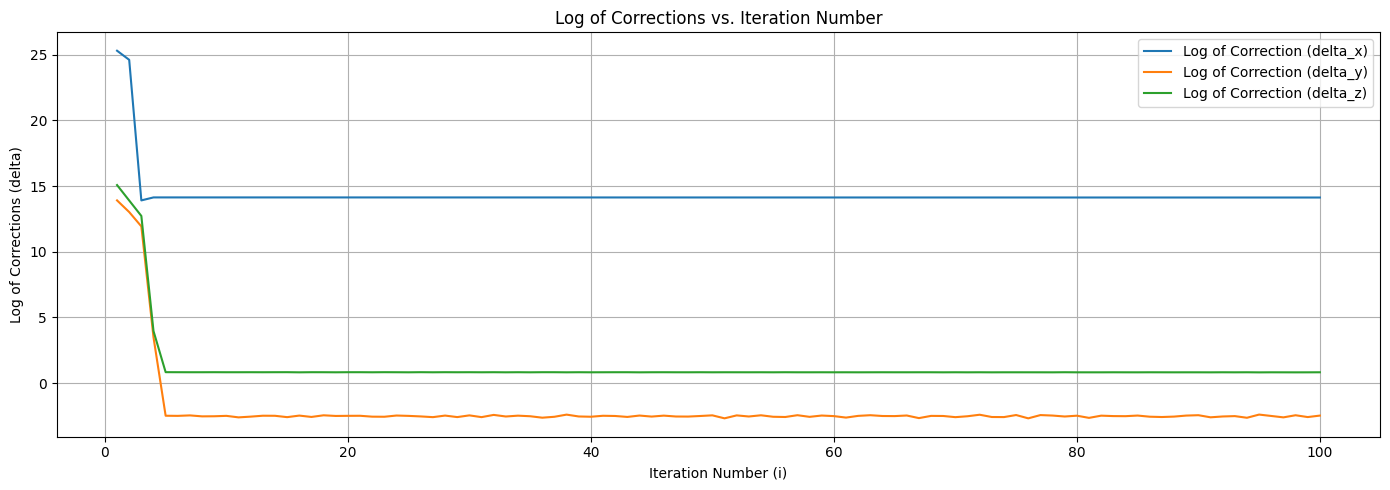

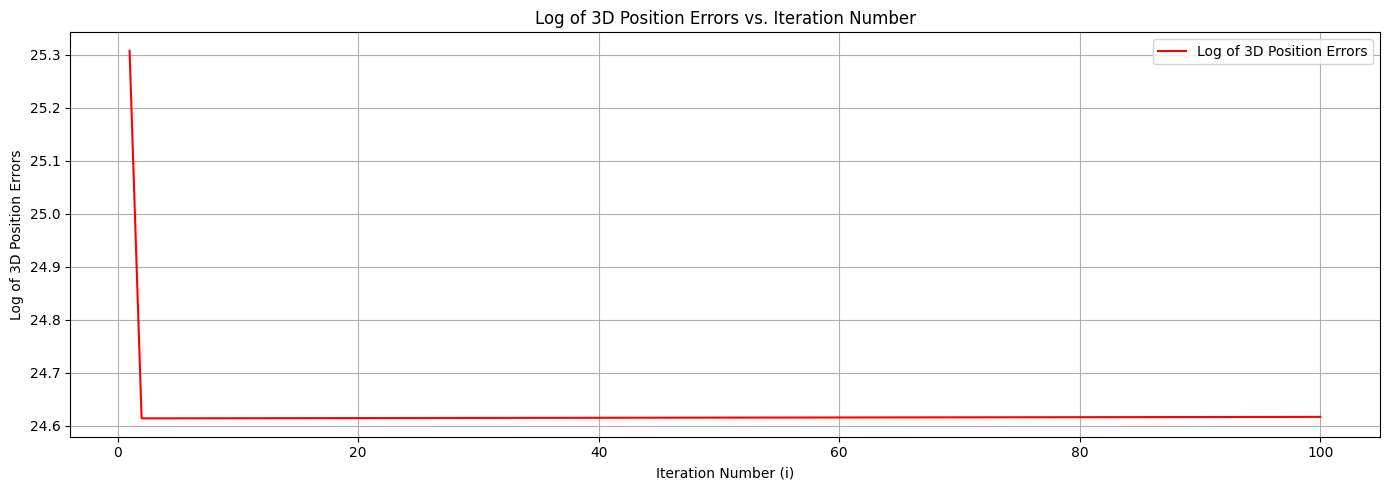

In [143]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total). Make sure to include proper axes information, legend, grid lines and title.
# Convert iteration data to numpy arrays for plotting
arr_i = np.array(arr_i)
arr_w = np.array(arr_w)
arr_delta = np.array(arr_delta)
arr_err_pos = np.array(arr_err_pos)

# 1. Plot log of the misclosure w against the LSQ iteration number i
# (1 marks)
plt.figure(figsize=(14, 5))
plt.plot(arr_i, np.log(np.abs(arr_w)), label='Log of Misclosure (w)', color='blue')
plt.xlabel('Iteration Number (i)')
plt.ylabel('Log of Misclosure (w)')
plt.title('Log of Misclosure vs. Iteration Number')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 2. Plot log of the corrections delta against the LSQ iteration number i
# (1 marks)
plt.figure(figsize=(14, 5))
plt.plot(arr_i, np.log(np.abs(arr_delta[:, :3])), label=['Log of Correction (delta_x)', 'Log of Correction (delta_y)', 'Log of Correction (delta_z)'])
plt.xlabel('Iteration Number (i)')
plt.ylabel('Log of Corrections (delta)')
plt.title('Log of Corrections vs. Iteration Number')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Plot log of the 3D position errors against the LSQ iteration number i
# (1 marks)
plt.figure(figsize=(14, 5))
plt.plot(arr_i, np.log(np.abs(arr_err_pos)), label='Log of 3D Position Errors', color='red')
plt.xlabel('Iteration Number (i)')
plt.ylabel('Log of 3D Position Errors')
plt.title('Log of 3D Position Errors vs. Iteration Number')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena
# (2 marks)
# 1. Log of Misclosure w vs. Iteration Number i
# Phenomenon:The log of the misclosure values throughout the iterations generally exhibits a declining trend.
# Explanation: As the iterations go on, this pattern shows that the misclosures—which stand for the discrepancies between observed and predicted pseudorange measurements—are getting less. It demonstrates how well residual errors are reduced by the iterative LSE procedure, enhancing the model's fit to the data.

# 2. Log of Corrections δ vs. Iteration Number i
# Phenomenon: As iterations proceed, the log of corrections stabilizes after initially declining quickly.
# Justification: In iterative optimization, this phenomenon is common. To get estimates closer to the actual values, significant corrections are first done.The corrections are lower as the iterations go on, suggesting that the estimates are convergent and that additional modifications produce diminishing gains.

# 3.Log of 3D Position Errors vs. Iteration Number i
# phenomenon:The graph displays a sharp rise at first, followed by a leveling down of the log of 3D position errors vs. iteration number i
# Justification:Position errors are severe at first, but they settle as iterations go on. By decreasing the position errors and convergently reaching a stable solution,this shows that the LSE process is improving the receiver's location estimates.The final leveling off shows good convergence,however the earlier surge might have been caused by initial corrections that resulted in significant modifications.

In [144]:
# this is just for fun (no marks allocated)
# now you can estimated the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!

# ECEF from Latitude,Longitude, Height (ellipsoidal)

# X : 6378.137   km, Y : 0   km
